In [218]:
import ujson as uj
import pandas as pd
import feather
import random
from utils import render_single, render_multiple, get_dataset_files, extract_random_entries, generate_pixel_columns
from IPython.display import display, Image as IPImage
%load_ext autoreload
%autoreload 2

ImportError: cannot import name 'get_pixel_data2' from 'utils' (/home/chris/swd_2/applied-ai/final-project/notebook/utils.py)

In [ ]:
files = get_dataset_files()
files = random.choices(files, k=1)
data = [extract_random_entries(file, 1000, recognized=True) for file in files]
flat_data = [item for sublist in data for item in sublist]
df = pd.DataFrame.from_dict(flat_data, orient='columns')
word = flat_data[0]['word']
print(f'Loaded {len(df)} entries from {files}')

Loaded 1000 entries from ['../dataset/bear.ndjson']


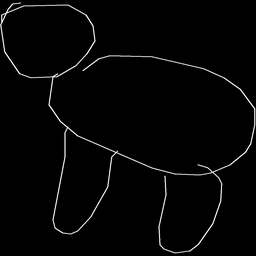

In [ ]:
img = random.choice(flat_data)['drawing']
display(IPImage(render_single(img, magnification=4, invert_color=True)))

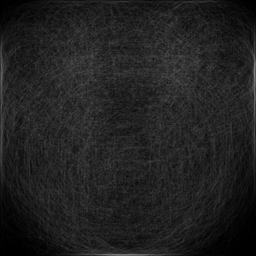

In [ ]:
imgs = df.sample(1000)['drawing']
display(IPImage(render_multiple(imgs, invert_color=True)))

In [ ]:
df2 = generate_pixel_columns(df, resolution=28, invert_color=True).drop(columns=['countrycode', 'timestamp', 'recognized', 'key_id', 'drawing'])
print(df2.sample(1))
#df2.to_feather('../processed.dat')

     word  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
375  bear     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

     pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
375     0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   

     pixel780  pixel781  pixel782  pixel783  
375       0.0       0.0       0.0       0.0  

[1 rows x 785 columns]


In [ ]:
#df3 = pd.read_feather('../processed.dat')
#print(df3)

#one hot encode words
word_columns = pd.get_dummies(df2['word'])
result = pd.concat([df2, word_columns], axis=1).drop(columns=['word'])
print(result)
result.to_feather('../processed.dat')

     pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       1.0     1.0     1.0     1.0     1.0     1.0     1.0     1.0     1.0   
1       1.0     1.0     1.0     1.0     1.0     1.0     1.0     1.0     1.0   
2       1.0     1.0     1.0     1.0     1.0     1.0     1.0     1.0     1.0   
3       1.0     1.0     1.0     1.0     1.0     1.0     1.0     1.0     1.0   
4       1.0     1.0     1.0     1.0     1.0     1.0     1.0     1.0     1.0   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
995     1.0     1.0     1.0     1.0     1.0     1.0     1.0     1.0     1.0   
996     1.0     1.0     1.0     1.0     1.0     1.0     1.0     1.0     1.0   
997     1.0     1.0     1.0     1.0     1.0     1.0     1.0     1.0     1.0   
998     1.0     1.0     1.0     1.0     1.0     1.0     1.0     1.0     1.0   
999     1.0     1.0     1.0     1.0     1.0     1.0     1.0     1.0     1.0   

     pixel9  ...  pixel65527  pixel65528  pixel6552

ImportError: Missing optional dependency 'pyarrow'.  Use pip or conda to install pyarrow.